# Quickstart

In [2]:
%load_ext autoreload
%autoreload 2

## Package Overview

- The UP42 Python SDK uses six object classes, representing the **hierarchical structure** of the UP42 platform:
    - **Project > Workflow > Job > JobTask**,
    - **Catalog** and
    - **Tools**.
- Each object (besides Catalog and Tools) provides the full functionality at that specific level and can spawn elements of one level below, e.g.
    - `project = up42.initialize_project()`
    - `workflow = Project().create_workflow()`
    - `job = workflow.create_and_run_job()`
- Usually a user starts by creating a project object and then spawns objects of a lower level.
- It is also possible to directly access a lower-level object, e.g. a job that was already run on UP42 can be used to initialize the corresponding object via `up42.initialize_job(job_id='123456789')`.

## 30 seconds example

After authentication with the UP42 project, a new workflow is created and filled with tasks (Sentinel-2 data, image sharpening). 
The area of interest and workflow parameters are defined. After running the job, the results are downloaded and visualized.

In [3]:
import up42

In [4]:
up42.authenticate("config.json")
project = up42.initialize_project()
project

2020-04-06 17:01:17,658 - up42.auth - INFO - Got credentials from config file.
2020-04-06 17:01:17,926 - up42.auth - INFO - Authentication with UP42 successful!
2020-04-06 17:01:17,926 - up42 - INFO - Working on Project with project_id 8956d18d-33bc-47cb-93bd-0055ff21da8f


Project(project_id=8956d18d-33bc-47cb-93bd-0055ff21da8f, auth=UP42ProjectAuth(project_id=8956d18d-33bc-47cb-93bd-0055ff21da8f, env=dev), info={'id': '8956d18d-33bc-47cb-93bd-0055ff21da8f', 'displayId': '8956d18d', 'createdAt': '2020-03-04T10:11:05.679Z', 'updatedAt': '2020-03-04T10:11:05.679Z', 'name': '30-seconds-example', 'description': 'up42-py showcase'})

In [5]:
# Add blocks/tasks to the workflow.
workflow = project.create_workflow(name="30-seconds-workflow", use_existing=True)
blocks = up42.get_blocks(basic=True)
input_tasks= [blocks['sobloo-s2-l1c-aoiclipped'], 
              blocks['sharpening']]
workflow.add_workflow_tasks(input_tasks=input_tasks)

2020-04-06 17:01:18,380 - up42.project - INFO - Getting existing workflows in project ...
2020-04-06 17:01:18,810 - up42.project - INFO - Got 10 workflows for project 8956d18d-33bc-47cb-93bd-0055ff21da8f.
100%|██████████| 10/10 [00:04<00:00,  2.39it/s]
2020-04-06 17:01:23,002 - up42.project - INFO - Using existing workflow: 30-seconds-workflow, 7fb2ec8a-45be-41ad-a50f-98ba6b528b98.
2020-04-06 17:01:23,634 - up42.tools - INFO - Getting blocks name and id, use basic=False for all block details.
2020-04-06 17:01:24,895 - up42.workflow - INFO - Added tasks to workflow: [{'name': 'sobloo-s2-l1c-aoiclipped:1', 'parentName': None, 'blockId': 'a2daaab4-196d-4226-a018-a810444dcad1'}, {'name': 'sharpening:1', 'parentName': 'sobloo-s2-l1c-aoiclipped:1', 'blockId': '4ed70368-d4e1-4462-bef6-14e768049471'}]


In [6]:
# Define the aoi and input parameters of the workflow to run it.
aoi = workflow.read_vector_file("data/aoi_berlin.geojson", as_dataframe=True)
input_parameters = workflow.construct_parameters(geometry=aoi, 
                                                 geometry_operation="bbox", 
                                                 start_date="2020-01-01",
                                                 end_date="2020-01-20",
                                                 limit=1)
input_parameters

{'sobloo-s2-l1c-aoiclipped:1': {'time': '2020-01-01T00:00:00Z/2020-01-20T00:00:00Z',
  'limit': 1,
  'zoom_level': 14,
  'max_cloud_cover': 100,
  'bbox': [13.375966, 52.515068, 13.378314, 52.516639]},
 'sharpening:1': {'strength': 'medium'}}

In [7]:
job = workflow.create_and_run_job(input_parameters=input_parameters)
job.track_status()

2020-04-06 17:01:25,491 - up42.workflow - INFO - Selected input_parameters: {'sobloo-s2-l1c-aoiclipped:1': {'time': '2020-01-01T00:00:00Z/2020-01-20T00:00:00Z', 'limit': 1, 'zoom_level': 14, 'max_cloud_cover': 100, 'bbox': [13.375966, 52.515068, 13.378314, 52.516639]}, 'sharpening:1': {'strength': 'medium'}}.
2020-04-06 17:01:27,088 - up42.workflow - INFO - Created and running new job: 8897a5a4-f35a-4a3b-9c70-c2d01af097b7.
2020-04-06 17:01:27,509 - up42.job - INFO - Tracking job status continuously, reporting every 30 seconds...
2020-04-06 17:02:00,519 - up42.job - INFO - Job finished successfully! - 8897a5a4-f35a-4a3b-9c70-c2d01af097b7


'SUCCEEDED'

In [8]:
job.download_results()

2020-04-06 17:02:05,563 - up42.job - INFO - Downloading results of job 8897a5a4-f35a-4a3b-9c70-c2d01af097b7
2020-04-06 17:02:05,564 - up42.job - INFO - Download directory: /Users/christoph.rieke/repos/up42-py/examples/project_8956d18d-33bc-47cb-93bd-0055ff21da8f/job_8897a5a4-f35a-4a3b-9c70-c2d01af097b7
100%|██████████| 1/1 [00:00<00:00,  1.22it/s]
2020-04-06 17:02:07,404 - up42.utils - INFO - Download successful of 1 files ['/Users/christoph.rieke/repos/up42-py/examples/project_8956d18d-33bc-47cb-93bd-0055ff21da8f/job_8897a5a4-f35a-4a3b-9c70-c2d01af097b7/result_57d173b2-1d75-446b-9e9a-877526fe5af6.tif']


['/Users/christoph.rieke/repos/up42-py/examples/project_8956d18d-33bc-47cb-93bd-0055ff21da8f/job_8897a5a4-f35a-4a3b-9c70-c2d01af097b7/result_57d173b2-1d75-446b-9e9a-877526fe5af6.tif']

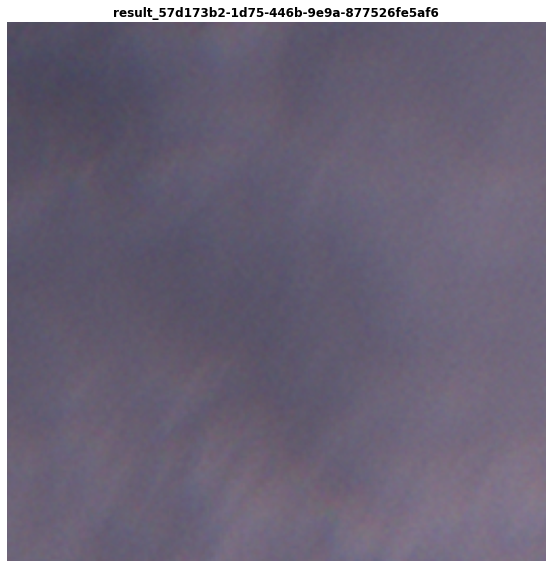

In [9]:
job.plot_results()